In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

__Task : Handling Irregular and Unsuable Data__

* Data have thousands of records and there can be irregularities in datasets
* Chance of some corrupt or faulty data
* Because of data entry error or something else
* Find any unusable data and deal with it, to avoid issues
* Eg: user ages may have been recorded incorrectly
* Check for evidence and take appropriate actions

In [65]:
users_w_devices_and_transactions = pd.read_csv('datasets/users_w_devices_and_transactions.csv')

In [66]:
users_w_devices_and_transactions.head(n=6)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,no,yes,no,NaN,261,1,-1,0,NaN,no,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,no,yes,no,NaN,151,1,-1,0,NaN,no,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,no,yes,yes,NaN,76,1,-1,0,NaN,no,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,NaN,no,yes,no,NaN,92,1,-1,0,NaN,no,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,NaN,single,NaN,no,no,no,NaN,198,1,-1,0,NaN,no,1995-08-01,mobile
5,c6aee0d4-2a86-4bac-827b-c6d33b5933e6,2.0,231.0,35,management,married,tertiary,no,yes,no,NaN,139,1,-1,0,NaN,no,2000-06-21,desktop


> Identify users with age greater than 150, as age higher than 150 can be an faulty data

* Below shows two data points have age above 150, which is fault data

In [67]:
users_w_devices_and_transactions[users_w_devices_and_transactions['age']>150]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
7228,44fefdad-7045-4be5-890e-12e84ae6fdc9,NaN,NaN,178,blue-collar,married,primary,no,yes,no,NaN,691,1,-1,0,NaN,no,1997-04-28,desktop
10318,9b2cd5d2-900e-4052-831f-6489f6d568af,2.0,3165.0,891,management,married,tertiary,no,yes,no,NaN,278,2,-1,0,NaN,no,2003-10-03,mobile


__Task__:
* Drop incorrect data
* Age above 150 is not logical and corrupted

In [73]:
users_cleaned = users_w_devices_and_transactions[users_w_devices_and_transactions.age < 150]

In [74]:
users_cleaned.shape

(45214, 19)

__Task__
* Identify more potentially erroneous data
* Compare age to device.

In [75]:
electronic_user_freq = pd.crosstab(users_cleaned['age'], users_cleaned['device']).reset_index()

<AxesSubplot:xlabel='age', ylabel='tablet'>

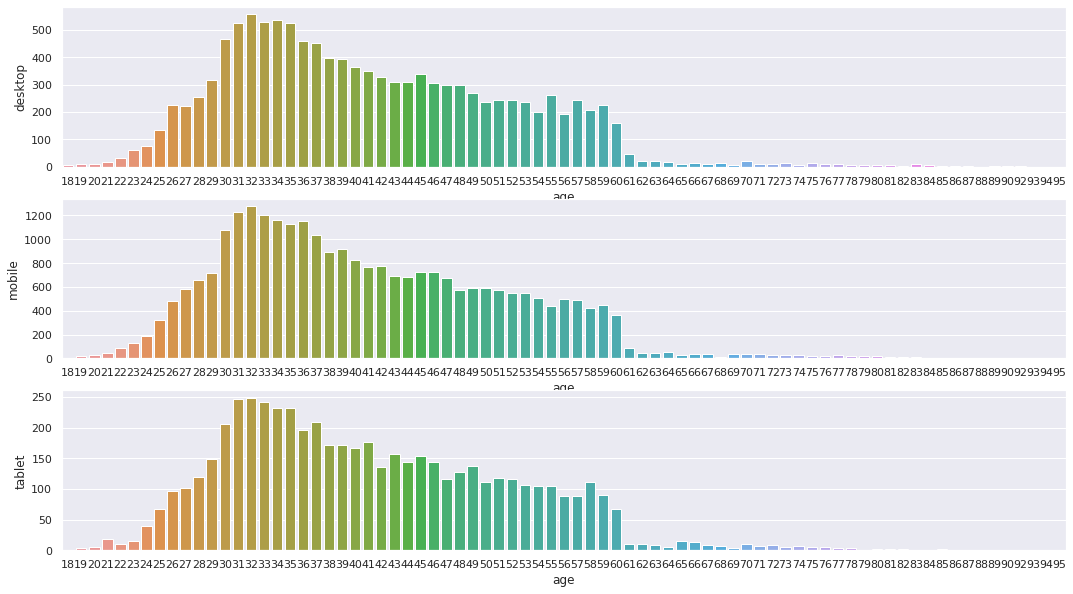

In [76]:
fig, axes = plt.subplots(3,1, figsize=(18,10))
sns.barplot(ax=axes[0], x='age', y='desktop', data=electronic_user_freq)
sns.barplot(ax=axes[1], x='age', y='mobile', data=electronic_user_freq)
sns.barplot(ax=axes[2], x='age', y='tablet', data=electronic_user_freq)

__Analysis__
* The above frequencey plot shows, younger users are more likely to use electronic devices to do their banking than old people
* As the age increase the use of desktop, mobile and tablet increases and as the age grows towards old age the use decreases

# Correcting Data Formats

* All data types in the datasets are cast correctly
* But need to convert string objects to boolean values, since some columns should be `true` or `false`
* Also date and time for cast as string, and need to convert it into date time format for easy processing

In [77]:
users_cleaned.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,no,yes,no,NaN,261,1,-1,0,NaN,no,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,no,yes,no,NaN,151,1,-1,0,NaN,no,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,no,yes,yes,NaN,76,1,-1,0,NaN,no,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,NaN,no,yes,no,NaN,92,1,-1,0,NaN,no,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,NaN,single,NaN,no,no,no,NaN,198,1,-1,0,NaN,no,1995-08-01,mobile


In [78]:
users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45214 non-null  object 
 1   number_transactions  35215 non-null  float64
 2   total_amount_usd     35215 non-null  float64
 3   age                  45214 non-null  int64  
 4   job                  44926 non-null  object 
 5   marital              45214 non-null  object 
 6   education            43357 non-null  object 
 7   default              45214 non-null  object 
 8   housing              45214 non-null  object 
 9   loan                 45214 non-null  object 
 10  contact              32196 non-null  object 
 11  duration             45214 non-null  int64  
 12  campaign             45214 non-null  int64  
 13  pdays                45214 non-null  int64  
 14  previous             45214 non-null  int64  
 15  poutcome             8255 non-null  

In [80]:
users_cleaned.default.value_counts()

no     44398
yes      816
Name: default, dtype: int64

> `default` variable only have yes/no values in string object, it would be better if there are cast as booleans

__Task__
* Convert the relevant variables to a Boolean type.

In [82]:
users_cleaned_1 = users_cleaned.copy() # work with a new object
users_cleaned_1.default = users_cleaned_1.default.map(dict(yes=1, no=0)).astype(bool)

In [83]:
users_cleaned_1.default.value_counts()

False    44398
True       816
Name: default, dtype: int64

In [84]:
# do the same for other variables as well

bool_vars = ['housing', 'loan', 'term_deposit']

for var in bool_vars:
    users_cleaned_1[var] = users_cleaned_1[var].map(dict(yes=1, no=0)).astype(bool)
    print(f'Converted {var} to Boolean.')

Converted housing to Boolean.
Converted loan to Boolean.
Converted term_deposit to Boolean.


In [85]:
users_cleaned_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45214 non-null  object 
 1   number_transactions  35215 non-null  float64
 2   total_amount_usd     35215 non-null  float64
 3   age                  45214 non-null  int64  
 4   job                  44926 non-null  object 
 5   marital              45214 non-null  object 
 6   education            43357 non-null  object 
 7   default              45214 non-null  bool   
 8   housing              45214 non-null  bool   
 9   loan                 45214 non-null  bool   
 10  contact              32196 non-null  object 
 11  duration             45214 non-null  int64  
 12  campaign             45214 non-null  int64  
 13  pdays                45214 non-null  int64  
 14  previous             45214 non-null  int64  
 15  poutcome             8255 non-null  

__Task__
* Convert date to date time format

In [87]:
users_cleaned_2 = users_cleaned_1.copy() # work with a new object

In [88]:
users_cleaned_2['date_joined'] = pd.to_datetime(users_cleaned_2['date_joined'], format='%Y-%m-%d')

In [91]:
users_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45214 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45214 non-null  object        
 1   number_transactions  35215 non-null  float64       
 2   total_amount_usd     35215 non-null  float64       
 3   age                  45214 non-null  int64         
 4   job                  44926 non-null  object        
 5   marital              45214 non-null  object        
 6   education            43357 non-null  object        
 7   default              45214 non-null  bool          
 8   housing              45214 non-null  bool          
 9   loan                 45214 non-null  bool          
 10  contact              32196 non-null  object        
 11  duration             45214 non-null  int64         
 12  campaign             45214 non-null  int64         
 13  pdays                45214 non-

#

# Deduplicating Data

* Large datasets is the presence of duplicates
* identify duplicate rows and then remove them from the dataset

In [92]:
# identify the duplicate data

duplicate_data = users_cleaned_2[users_cleaned_2.duplicated(keep=False)]

In [93]:
duplicate_data.shape

(10, 19)

In [95]:
duplicate_data

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
15456,cba59442-af3c-41d7-a39c-0f9bffba0660,2.0,1218.0,57,management,married,tertiary,True,True,False,cellular,317,6,-1,0,NaN,False,1993-02-27,desktop
22005,1e826721-b38c-41c2-88f4-4c28b335b1e6,4.0,159.0,31,technician,single,secondary,False,False,False,cellular,129,1,-1,0,NaN,False,1990-05-10,mobile
35413,a2fb8264-d55a-437b-a8e7-9ec4116b76f4,2.0,676.0,34,management,married,tertiary,False,False,False,cellular,156,1,177,1,success,False,1989-09-02,mobile
35620,f49ac08f-b872-4d57-ac82-9b8a9144020d,4.0,117.0,38,blue-collar,married,secondary,False,True,False,cellular,54,1,337,1,failure,False,2010-06-11,mobile
36292,ae3b92a2-cad8-434f-8037-9815e2228839,2.0,426.0,43,admin.,single,secondary,False,True,False,cellular,76,2,304,2,failure,False,1992-10-29,desktop
45211,cba59442-af3c-41d7-a39c-0f9bffba0660,2.0,1218.0,57,management,married,tertiary,True,True,False,cellular,317,6,-1,0,NaN,False,1993-02-27,desktop
45212,1e826721-b38c-41c2-88f4-4c28b335b1e6,4.0,159.0,31,technician,single,secondary,False,False,False,cellular,129,1,-1,0,NaN,False,1990-05-10,mobile
45213,a2fb8264-d55a-437b-a8e7-9ec4116b76f4,2.0,676.0,34,management,married,tertiary,False,False,False,cellular,156,1,177,1,success,False,1989-09-02,mobile
45214,ae3b92a2-cad8-434f-8037-9815e2228839,2.0,426.0,43,admin.,single,secondary,False,True,False,cellular,76,2,304,2,failure,False,1992-10-29,desktop
45215,f49ac08f-b872-4d57-ac82-9b8a9144020d,4.0,117.0,38,blue-collar,married,secondary,False,True,False,cellular,54,1,337,1,failure,False,2010-06-11,mobile


In [96]:
users_cleaned_final = users_cleaned_2[~users_cleaned_2.duplicated()]

In [98]:
# verify if the duplicate data now exists only once
users_cleaned_final[users_cleaned_final['user_id'] == 'cba59442-af3c-41d7-a39c-0f9bffba0660']

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
15456,cba59442-af3c-41d7-a39c-0f9bffba0660,2.0,1218.0,57,management,married,tertiary,True,True,False,cellular,317,6,-1,0,NaN,False,1993-02-27,desktop


In [99]:
users_cleaned_final.shape

(45209, 19)

# Handling Textual Data

* Consumer complaints data  can be of value for nlp exploration
* handling textual data is different than numeric and categorical data
* need a way to process the text, so its more conducive to analysis and machine learning

In [101]:
complaints_data = pd.read_csv('datasets/consumer_loan_complaints.csv')
complaints_data.head()

,user_id,Date received,Product,Issue,Consumer complaint narrative,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,44fefdad-7045-4be5-890e-12e84ae6fdc9,01/27/2016,Consumer Loan,Account terms and changes,NaN,AL,35180,Phone,01/27/2016,Closed with explanation,Yes,No,1760486
1,c49d5d60-909f-406b-b7ff-51143fcb650b,08/26/2014,Consumer Loan,Account terms and changes,NaN,NC,278XX,Phone,08/29/2014,Closed with non-monetary relief,Yes,No,1001740
2,9b2cd5d2-900e-4052-831f-6489f6d568af,08/22/2012,Consumer Loan,Account terms and changes,NaN,TN,37205,Referral,08/23/2012,Closed with non-monetary relief,Yes,No,140039
3,b7e5b324-268e-4502-81a1-1a025673c2a0,05/07/2013,Consumer Loan,Problems when you are unable to pay,NaN,OH,43081,Web,05/08/2013,Closed with explanation,Yes,Yes,401541
4,684eeb4c-c9c3-4a97-8213-f3962a6c0aba,06/15/2016,Consumer Loan,Managing the line of credit,NaN,NC,27216,Phone,09/08/2016,Closed with non-monetary relief,Yes,No,1970341


In [102]:
complaints_data.shape

(1824, 13)

In [103]:
complaints_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       1824 non-null   object
 1   Date received                 1824 non-null   object
 2   Product                       1824 non-null   object
 3   Issue                         1824 non-null   object
 4   Consumer complaint narrative  44 non-null     object
 5   State                         1801 non-null   object
 6   ZIP code                      1789 non-null   object
 7   Submitted via                 1824 non-null   object
 8   Date sent to company          1824 non-null   object
 9   Company response to consumer  1824 non-null   object
 10  Timely response?              1824 non-null   object
 11  Consumer disputed?            1824 non-null   object
 12  Complaint ID                  1824 non-null   int64 
dtypes: int64(1), objec